# Assignment #1

Author: François d'Entremont<br> 
Date: March 31, 2023<br> 
Course: GDAA2010

# Dataset
<b>The mushroom dataset</b> \
This dataset contains 23 categorical variables describing the characteristics of 8124 mushrooms. The target variable is the edibility of the mushroom and is comprised of two categories, edible and poisonous. How well can we predict if a mushroom is edible or poisonous based on its attribute information?

# Loading the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# import validation metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score, 
                             classification_report, roc_curve, auc)


warnings.filterwarnings("ignore")

# Data Preparation

## Load the dataset

In [2]:
column_names = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 
                'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 
                'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 
                'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 
                'population', 'habitat']
mushroom_data = pd.read_csv("agaricus-lepiota.data", header=None, na_values='?', names=column_names)

### Attribute Information
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### Target Information
class: poisonous=p,edible=e

In [3]:
# Print the first twenty rows of the dataset
mushroom_data.head(20)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
# Check the dataset info
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                5644 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [5]:
# Check for null values
print(mushroom_data.isnull().sum())

class                          0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64


In [6]:
mushroom_data['stalk_root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk_root, dtype: int64

## How to deal with missing values
To deal with missing values, we could either remove them or impute them with the mode. 'stalk_root' has 2480 null values out of 8124 records. It's a hard decision to make because we would be losing 2480 records of data but most of these records is likely to be b (the mode). 2/3 of the records is likely to be b. that means out of the 2480 null values, only 826 are likely to be imputed incorrectly, which is 10% of the total data. The records where the imputation is in reality not b will have a negative impact on the model but the positives outweigh the negatives. We are going to deal with the missing data by imputing the NA values with the mode because the 2480 mushrooms contain a lot of information that could benefit the model.


In [7]:
mushroom_data['stalk_root'].fillna(mushroom_data['stalk_root'].mode()[0], inplace=True)

In [8]:
mushroom_data.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

Now our data has no missing values.

# Exploratory Data Analysis

We can look at the distributions of our categorical variables

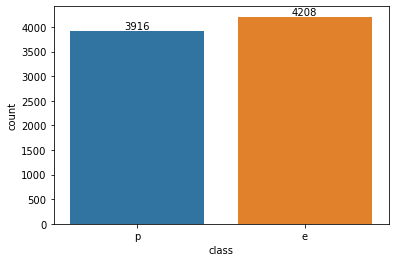

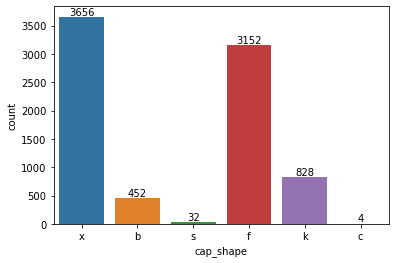

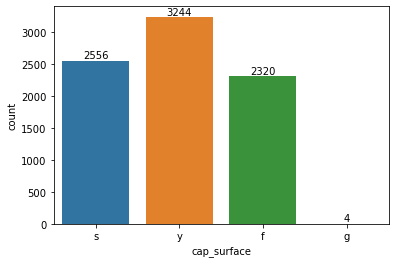

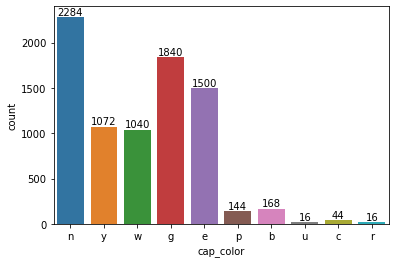

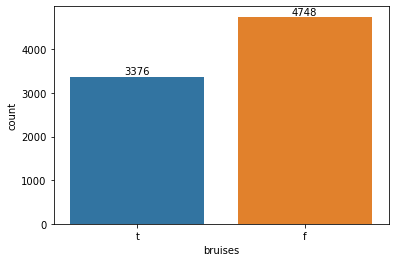

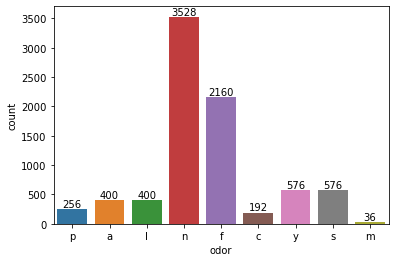

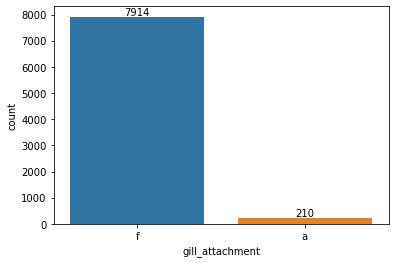

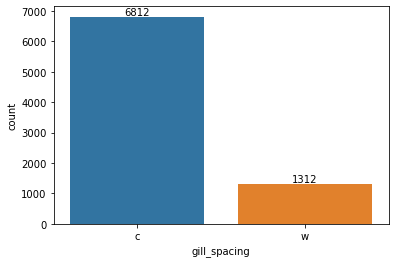

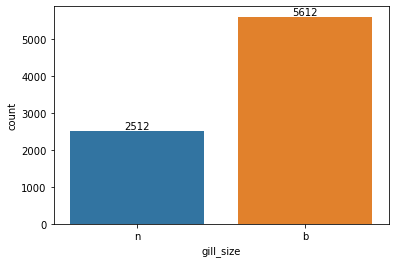

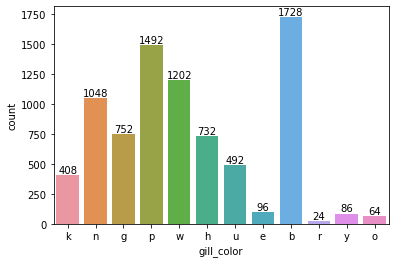

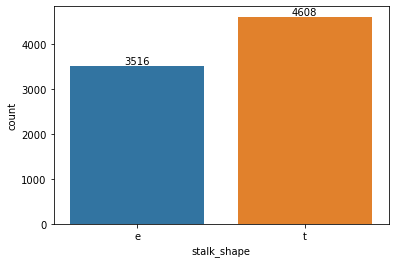

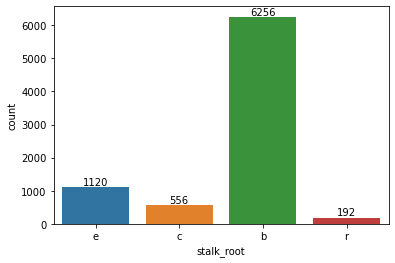

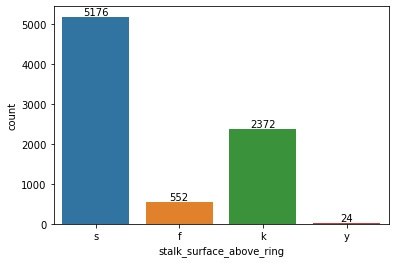

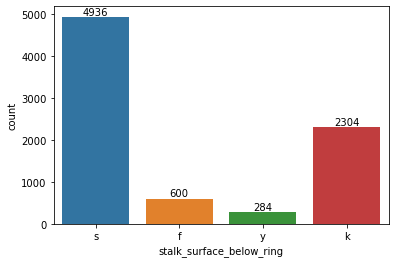

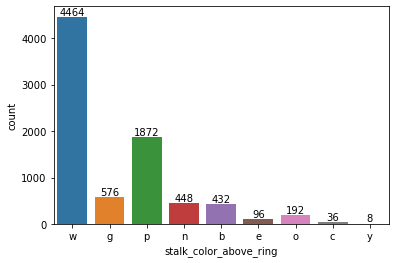

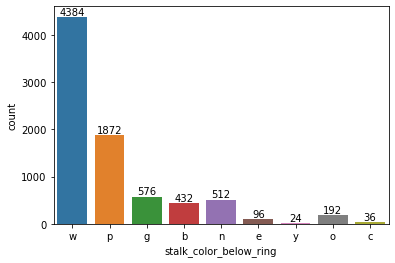

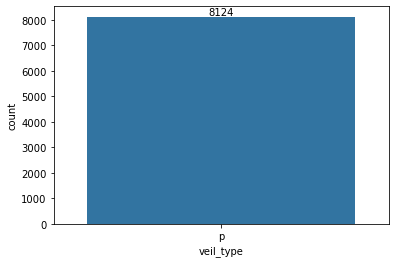

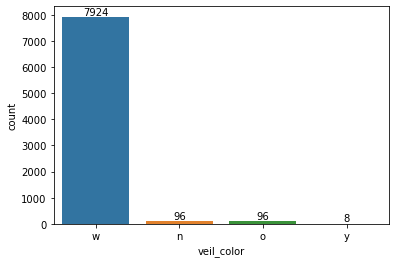

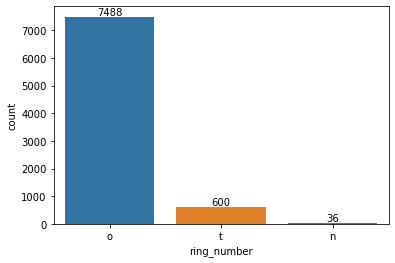

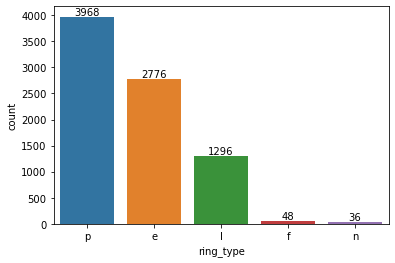

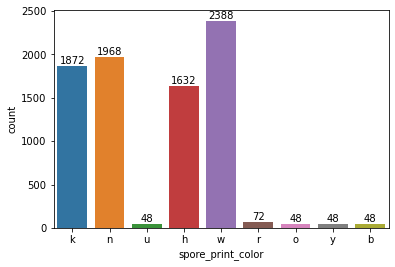

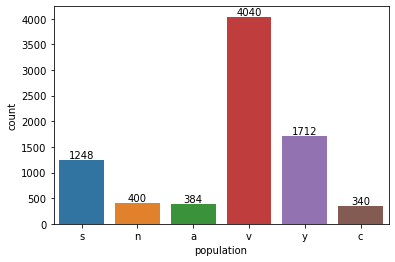

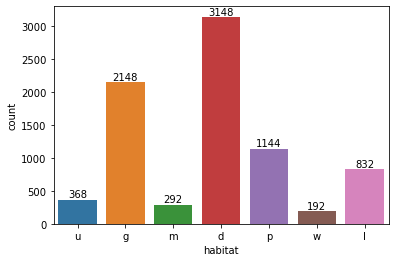

In [9]:
for i, col in enumerate(mushroom_data.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, data=mushroom_data)
    ax = sns.countplot(x=col, data=mushroom_data)
    ax.bar_label(ax.containers[0])
    plt.show()

We are happy to see that the class variable is close to balanced.

In our dataset, veil_type only has one category (p). It will not add any value to the model because it has no variation or predictive power. Including this predictor can actually harm the model and introduce noise. We will remove it from our dataset. 

In [10]:
mushroom_data.drop("veil_type",axis=1,inplace=True)

3 predictors are highly imbalanced: ring_number, veil_color, and gill_attachment. Will be look at their relashionships to the target variable.

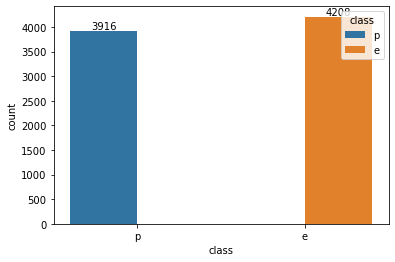

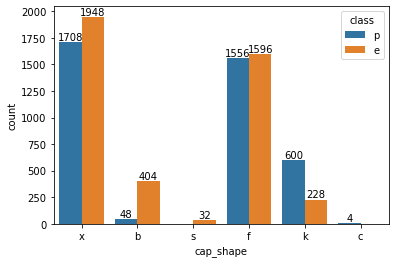

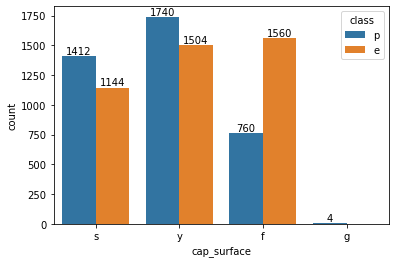

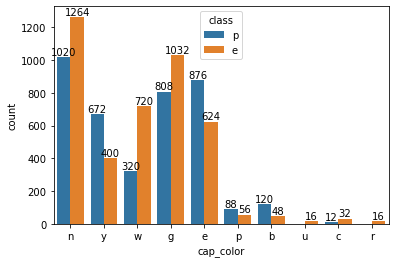

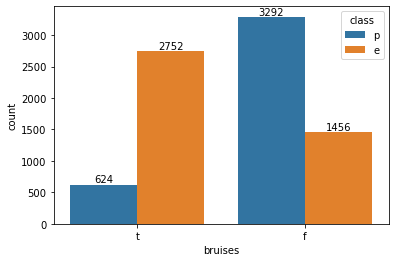

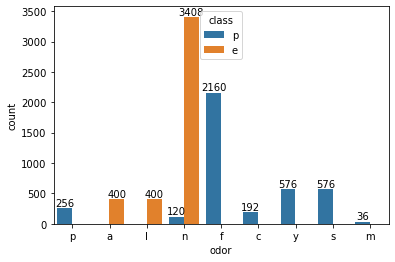

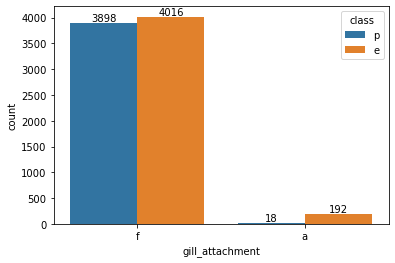

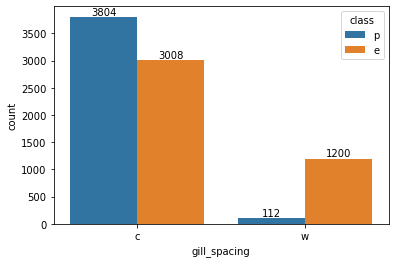

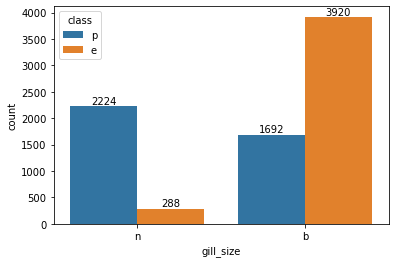

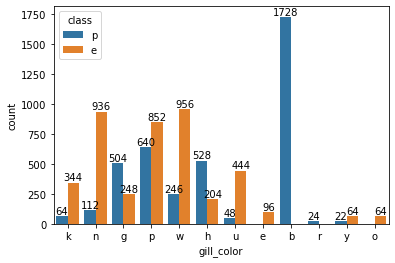

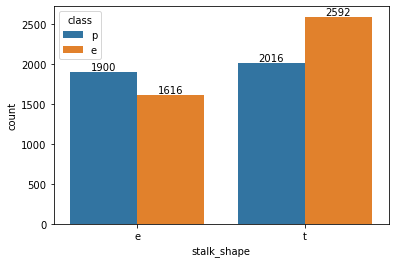

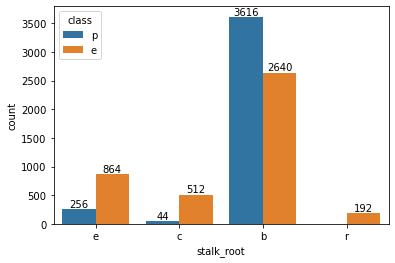

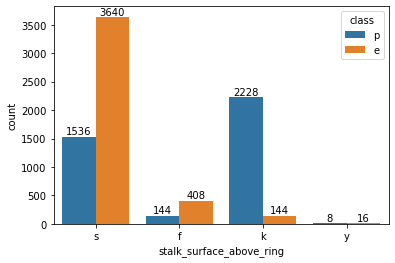

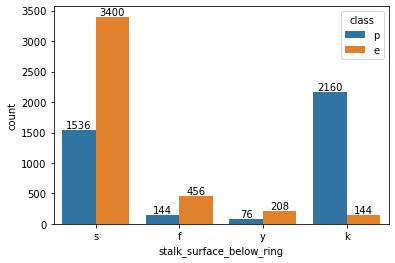

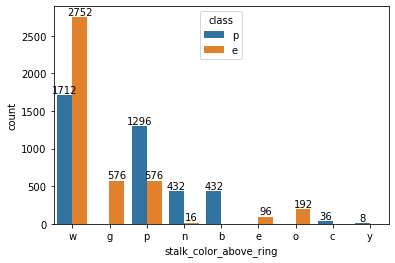

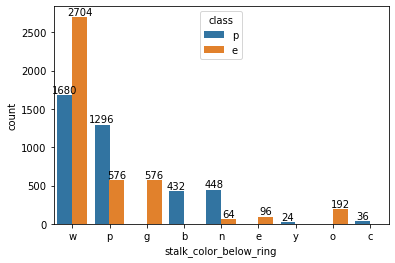

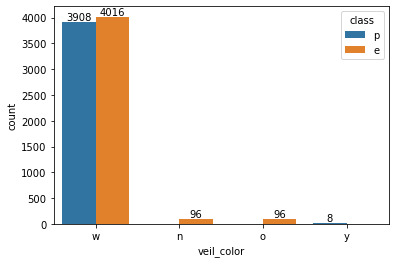

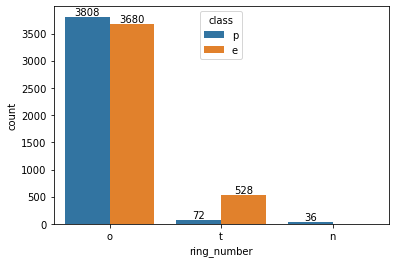

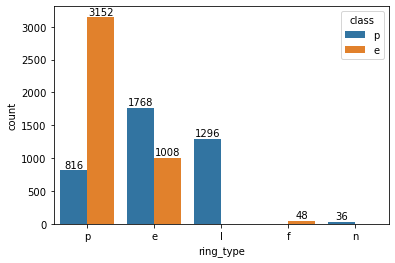

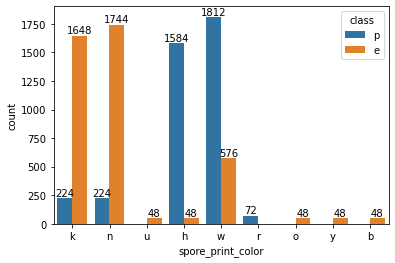

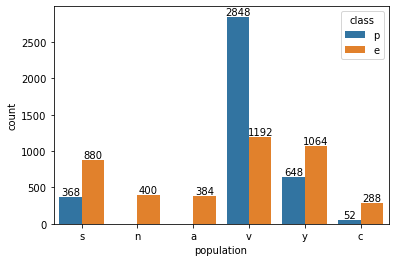

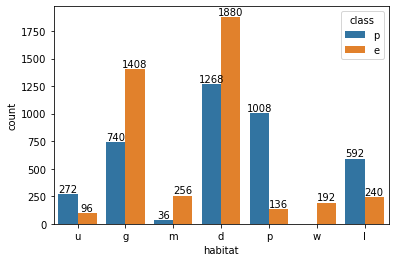

In [11]:
for i, col in enumerate(mushroom_data.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, hue='class', data=mushroom_data)
    for container in sns_plot.containers:
        sns_plot.bar_label(container)
    


Things to note:
- edible mushrooms are more likely to have bruising
- edible mushrooms are most likely to have no odor while poisonous mushrooms will have a foul odor
- the stalk surface in edible mushrooms are smooth while poisonous mushrooms are usually silky
- the gill size of edible mushrooms are usually broad while poisonous mushrooms are a mix of both broad and narrow
- the spore print color of edible mushrooms are usually black or brown. Poisonous mushrooms are chocolate and white
- ring_number, veil_color, and gill_attachment aren't good predictors because most of the data is in a category where there is a close to equal number of edible and poisonous mushrooms.

In [12]:
# The number of levels for each categorical variable
mushroom_data.nunique().sort_values(ascending=False)

gill_color                  12
cap_color                   10
spore_print_color            9
odor                         9
stalk_color_below_ring       9
stalk_color_above_ring       9
habitat                      7
population                   6
cap_shape                    6
ring_type                    5
stalk_surface_below_ring     4
veil_color                   4
stalk_root                   4
stalk_surface_above_ring     4
cap_surface                  4
ring_number                  3
stalk_shape                  2
gill_size                    2
gill_spacing                 2
gill_attachment              2
bruises                      2
class                        2
dtype: int64

The number of levels per variable can have a significant impact on a machine learning model's performance. In general, having a large number of levels can lead to overfitting, especially if there is insufficient data to support all of the levels. This is because the model may learn to fit the noise in the data, rather than the underlying patterns, which can result in poor generalization to new data.

On the other hand, having too few levels can lead to underfitting, where the model is not able to capture all of the relevant information in the data. This can result in poor performance, as the model may miss important patterns or relationships in the data.

## One-hot encoding

Applying one-hot encoding to our dataset. One-hot encoding is a process of converting categorical variables into zeros and ones to enable machine learning models to understand and use them effectively. It involves creating new columns for each unique value in a categorical variable and encoding the presence or absence of that value in each row of the dataset as a binary value (1 or 0). We are performing this step to preprocess the categorical variables in the mushroom dataset for machine learning models.

In [13]:
mushroom_data = pd.get_dummies(mushroom_data, columns=mushroom_data.columns.drop('class'))

In [14]:
mushroom_data

,class,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,e,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,e,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [15]:
# replace 'p' with 1 and 'e' with 0 in the 'class' column
mushroom_data['class'] = mushroom_data['class'].replace({'p': 1, 'e': 0})

In [16]:
mushroom_data

,class,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


Now we have a dataset full of ones and zeros and we are done our data preparation.

# Data Modeling

## Stratified K-folds Cross Validation
This will divide my dataset into k folds, where the data is trained on k-1 of the folds and tested on the remaining fold. This process is repeated until each fold serves as the test set exactly once and then averaged over the k trials. This helps reduce overfitting and provides a more reliable estimate of model performance.

It tries to automatically balance the target variable in both training and validation datasets and preserves proportion of samples of each class in each fold

Since we have 3 heavily unbalanced  predictors, Stratified K-folds will ward off issues such as unbalanced variables and overfitting.

We will pick k=5, meaning our training/test splits are 80% training set and 20% test set for each iteration.

## Random Forest Classifier

Random forest is a machine learning algorithm that creates an ensemble of decision trees at random and combines their output to make predictions, with the number of trees, such as 100 trees, being a hyperparameter that can be adjusted to optimize model performance.

In [17]:
X = mushroom_data.drop('class', axis = 1)
y = mushroom_data[['class']]
y_labels = ['Edible', 'Poisonous']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Train 1: [   1    2    3 ... 8121 8122 8123] 
Test 1: [   0    6   11 ... 8107 8115 8119] 
Accuracy 1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


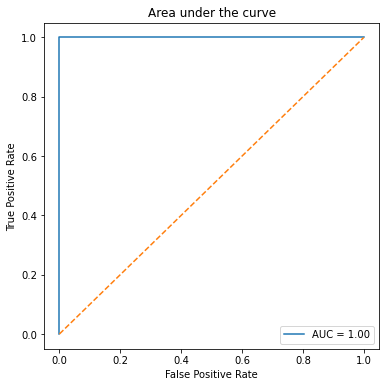

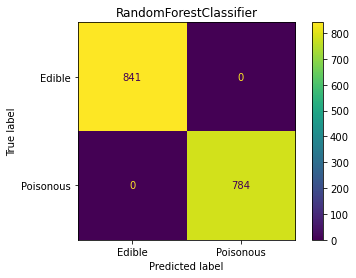

---------------------
Train 2: [   0    1    3 ... 8121 8122 8123] 
Test 2: [   2    4    8 ... 8114 8116 8117] 
Accuracy 2: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


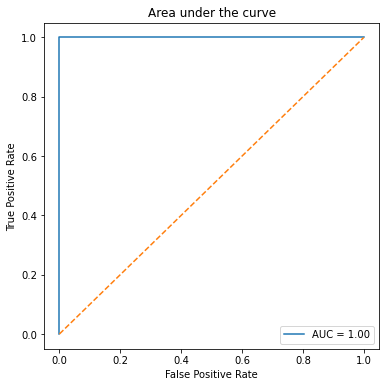

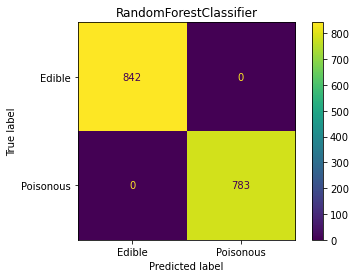

---------------------
Train 3: [   0    1    2 ... 8120 8122 8123] 
Test 3: [   3    5    9 ... 8103 8109 8121] 
Accuracy 3: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


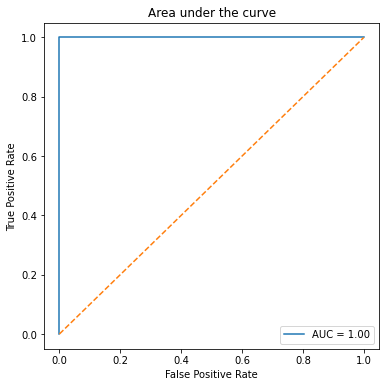

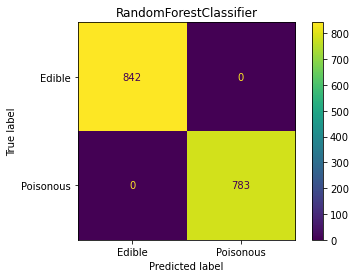

---------------------
Train 4: [   0    1    2 ... 8120 8121 8122] 
Test 4: [  13   16   17 ... 8101 8105 8123] 
Accuracy 4: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


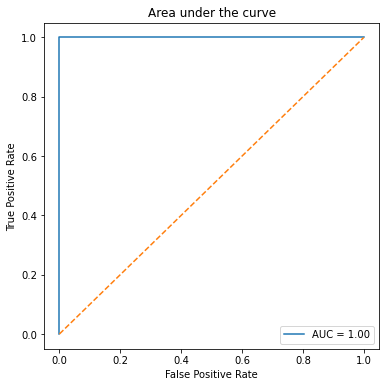

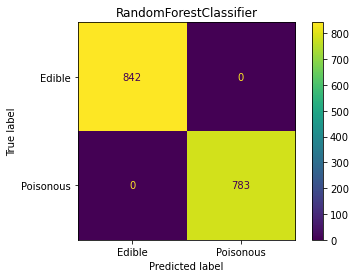

---------------------
Train 5: [   0    2    3 ... 8119 8121 8123] 
Test 5: [   1    7   14 ... 8118 8120 8122] 
Accuracy 5: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

AUC value: 1.0


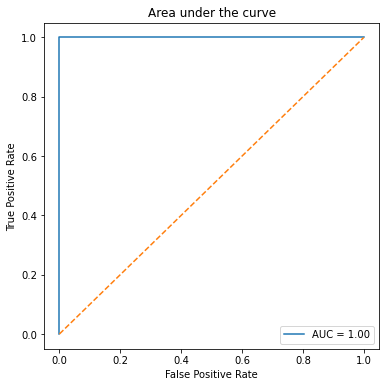

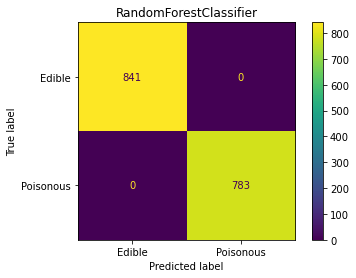

---------------------
Mean accuracy : 1.0
Standard Deviation : 0.0


In [18]:
# create Random Forest classifier model
rfc = RandomForestClassifier(n_estimators = 100, 
                             random_state = 42)
accuracy = []

# Create k-folds cross validation object
k = 5
cv = StratifiedKFold(n_splits = k,
                     shuffle = True, 
                     random_state = 42)
for train_index, test_index in cv.split(X,y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    rfc.fit(X1_train, y1_train)
    prediction = rfc.predict(X1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)
    print(f'Train {len(accuracy)}:', 
          train_index, f'\nTest {len(accuracy)}:', 
          test_index, f'\nAccuracy {len(accuracy)}:', 
          score)
    print(classification_report(y1_test, prediction))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, prediction)
    auc_1 = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(6, 6))
    plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc_1)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc='lower right')
    plt.title("Area under the curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print('AUC value:', auc_1)
    # display confusion matrix
    cm = confusion_matrix(y1_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=y_labels)
    disp.plot()
    plt.title(f'{type(rfc).__name__}')
    plt.show()
    print('---------------------')
print('Mean accuracy :', np.array(accuracy).mean())
print('Standard Deviation :', np.array(accuracy).std())

Here we can see how K-fold cross-validation works: it splits the data into 5 sets of training and test data, and during each iteration, one of the 5 folds is used as the test set exactly once. Each set has 4/5 = 80% training data and 1/5 = 20% Test data. It then calculates the accuracy of each and averages it out.

## Logistic Regression Classifier

Logistic regression classifier is a statistical model that is commonly used to predict the probability of a binary response based on one or more predictor variables

Train 1: [   1    2    3 ... 8121 8122 8123] 
Test 1: [   0    6   11 ... 8107 8115 8119] 
Accuracy 1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


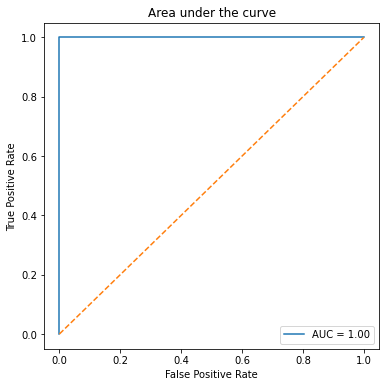

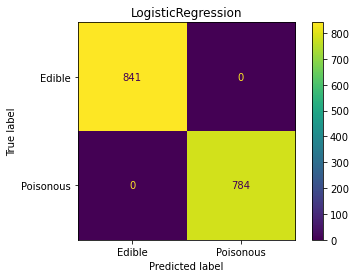

---------------------
Train 2: [   0    1    3 ... 8121 8122 8123] 
Test 2: [   2    4    8 ... 8114 8116 8117] 
Accuracy 2: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


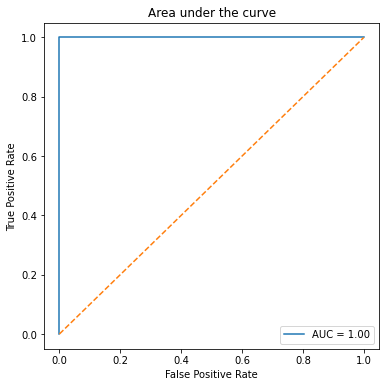

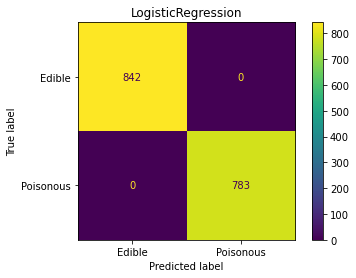

---------------------
Train 3: [   0    1    2 ... 8120 8122 8123] 
Test 3: [   3    5    9 ... 8103 8109 8121] 
Accuracy 3: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


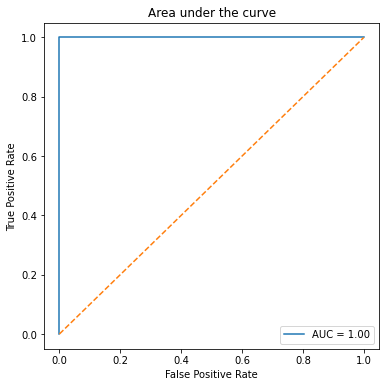

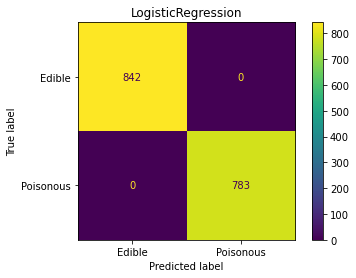

---------------------
Train 4: [   0    1    2 ... 8120 8121 8122] 
Test 4: [  13   16   17 ... 8101 8105 8123] 
Accuracy 4: 0.9993846153846154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 0.9993614303959131


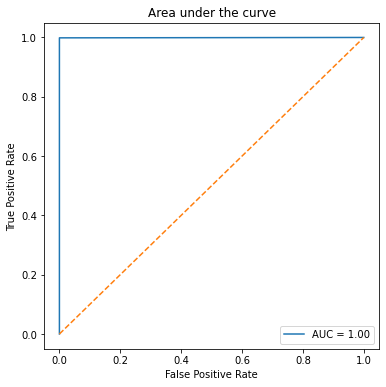

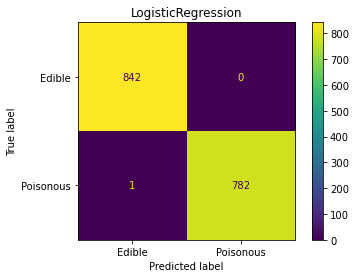

---------------------
Train 5: [   0    2    3 ... 8119 8121 8123] 
Test 5: [   1    7   14 ... 8118 8120 8122] 
Accuracy 5: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

AUC value: 1.0


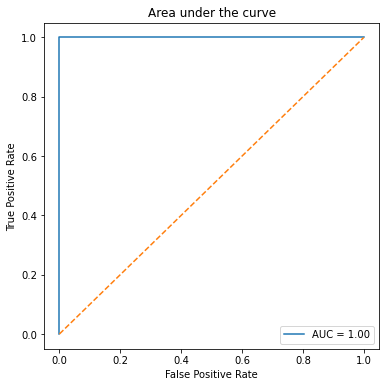

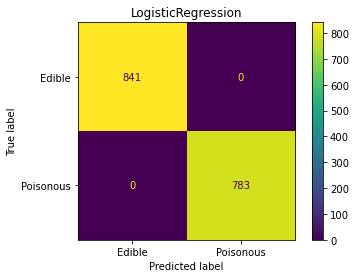

---------------------
Mean accuracy : 0.9998769230769231
Standard Deviation : 0.0002461538461538293


In [19]:
# create Logictic Regression Classifier model
lr = LogisticRegression(random_state = 42)
accuracy = []
for train_index, test_index in cv.split(X,y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X1_train, y1_train)
    prediction = lr.predict(X1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)
    print(f'Train {len(accuracy)}:', 
          train_index, f'\nTest {len(accuracy)}:', 
          test_index, f'\nAccuracy {len(accuracy)}:', 
          score)
    print(classification_report(y1_test, prediction))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, prediction)
    auc_1 = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(6, 6))
    plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc_1)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc='lower right')
    plt.title("Area under the curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print('AUC value:', auc_1)
    # display confusion matrix
    cm = confusion_matrix(y1_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=y_labels)
    disp.plot()
    plt.title(f'{type(lr).__name__}')
    plt.show()
    print('---------------------')
print('Mean accuracy :', np.array(accuracy).mean())
print('Standard Deviation :', np.array(accuracy).std())

## XG Boost Classifier

XGBoost is a popular gradient boosting algorithm that uses a collection of decision trees to make predictions by iteratively adding models to an ensemble, with each subsequent model focusing on the errors made by the previous models, while also incorporating regularization techniques to prevent overfitting.

Train 1: [   1    2    3 ... 8121 8122 8123] 
Test 1: [   0    6   11 ... 8107 8115 8119] 
Accuracy 1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


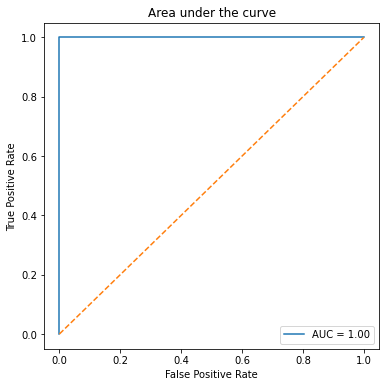

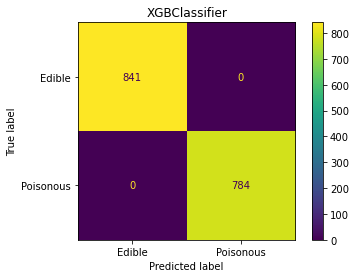

---------------------
Train 2: [   0    1    3 ... 8121 8122 8123] 
Test 2: [   2    4    8 ... 8114 8116 8117] 
Accuracy 2: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


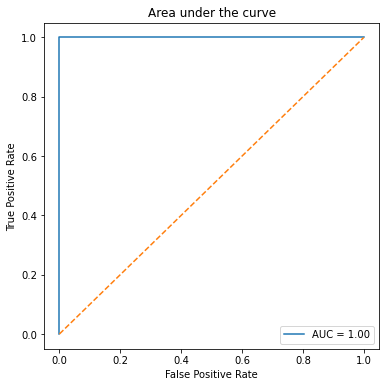

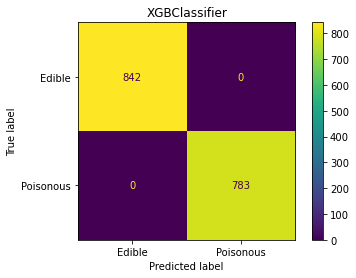

---------------------
Train 3: [   0    1    2 ... 8120 8122 8123] 
Test 3: [   3    5    9 ... 8103 8109 8121] 
Accuracy 3: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


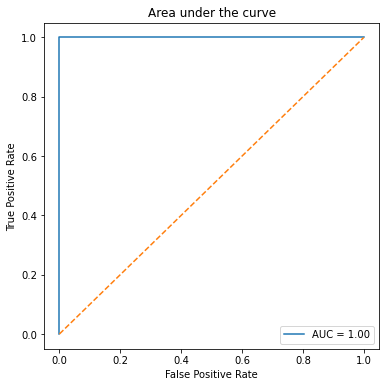

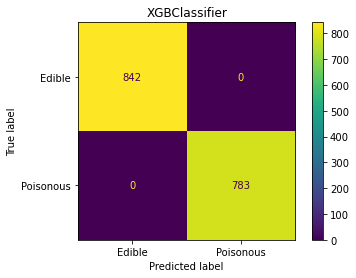

---------------------
Train 4: [   0    1    2 ... 8120 8121 8122] 
Test 4: [  13   16   17 ... 8101 8105 8123] 
Accuracy 4: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 1.0


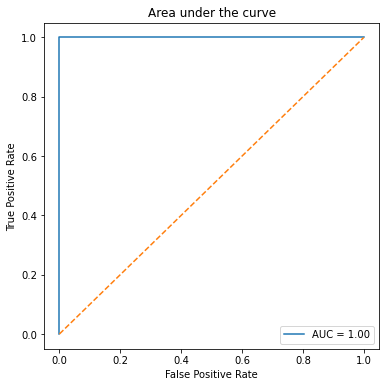

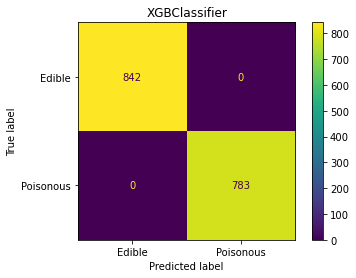

---------------------
Train 5: [   0    2    3 ... 8119 8121 8123] 
Test 5: [   1    7   14 ... 8118 8120 8122] 
Accuracy 5: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

AUC value: 1.0


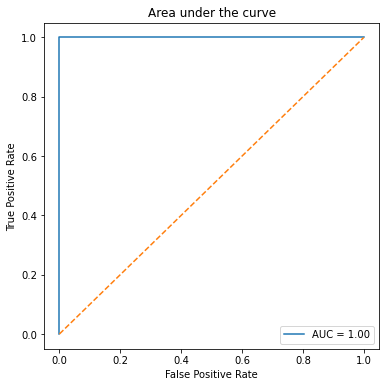

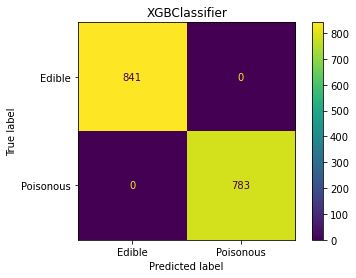

---------------------
Mean accuracy of the model : 1.0
Standard Deviation : 0.0


In [21]:
# create XG Boost model
xgb = XGBClassifier(random_state = 42)
accuracy = []
for train_index, test_index in cv.split(X,y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    xgb.fit(X1_train, y1_train)
    prediction = xgb.predict(X1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)
    print(f'Train {len(accuracy)}:', 
          train_index, f'\nTest {len(accuracy)}:', 
          test_index, f'\nAccuracy {len(accuracy)}:', 
          score)
    print(classification_report(y1_test, prediction))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, prediction)
    auc_1 = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(6, 6))
    plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc_1)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc='lower right')
    plt.title("Area under the curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print('AUC value:', auc_1)
    # display confusion matrix
    cm = confusion_matrix(y1_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=y_labels)
    disp.plot()
    plt.title(f'{type(xgb).__name__}')
    plt.show()
    print('---------------------')
print('Mean accuracy of the model :', np.array(accuracy).mean())
print('Standard Deviation :', np.array(accuracy).std())

Since my model is performing very well, let's remove 15 columns from our dataset to see which model performs the best and compare model performance.

In [22]:
column_names = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 
                'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
                'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 
                'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 
                'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 
                'population', 'habitat']
mushroom_data = pd.read_csv("agaricus-lepiota.data", header=None, na_values='?', names=column_names)
mushroom_data['stalk_root'].fillna(mushroom_data['stalk_root'].mode()[0], inplace=True)
mushroom_data.drop("veil_type",axis=1,inplace=True)

In [23]:
mushroom_data.drop("gill_attachment",axis=1,inplace=True)
mushroom_data.drop("gill_spacing",axis=1,inplace=True)
mushroom_data.drop("gill_size",axis=1,inplace=True)
mushroom_data.drop("gill_color",axis=1,inplace=True)
mushroom_data.drop("stalk_root",axis=1,inplace=True)
mushroom_data.drop("stalk_surface_above_ring",axis=1,inplace=True)
mushroom_data.drop("stalk_surface_below_ring",axis=1,inplace=True)
mushroom_data.drop("stalk_color_above_ring",axis=1,inplace=True)
mushroom_data.drop("veil_color",axis=1,inplace=True)
mushroom_data.drop("ring_number",axis=1,inplace=True)
mushroom_data.drop("ring_type",axis=1,inplace=True)
mushroom_data.drop("spore_print_color",axis=1,inplace=True)
mushroom_data.drop("population",axis=1,inplace=True)
mushroom_data.drop("habitat",axis=1,inplace=True)
mushroom_data.drop("stalk_shape",axis=1,inplace=True)

In [24]:
mushroom_data.head(10)

,class,cap_shape,cap_surface,cap_color,bruises,odor,stalk_color_below_ring
0,p,x,s,n,t,p,w
1,e,x,s,y,t,a,w
2,e,b,s,w,t,l,w
3,p,x,y,w,t,p,w
4,e,x,s,g,f,n,w
5,e,x,y,y,t,a,w
6,e,b,s,w,t,a,w
7,e,b,y,w,t,l,w
8,p,x,y,w,t,p,w
9,e,b,s,y,t,a,w


We have 6 predictors. Let's see how well it can perform.

In [25]:
mushroom_data = pd.get_dummies(mushroom_data, columns=mushroom_data.columns.drop('class'))
mushroom_data['class'] = mushroom_data['class'].replace({'p': 1, 'e': 0})

Train 1: [   1    2    3 ... 8121 8122 8123] 
Test 1: [   0    6   11 ... 8107 8115 8119] 
Accuracy 1: 0.9938461538461538
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       841
           1       0.99      1.00      0.99       784

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

AUC value: 0.993925022446553


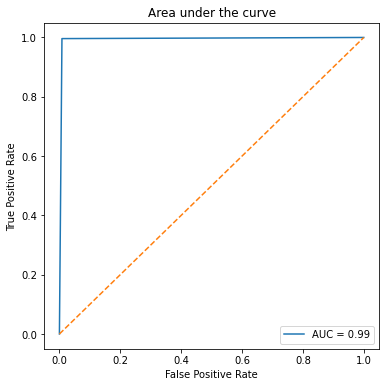

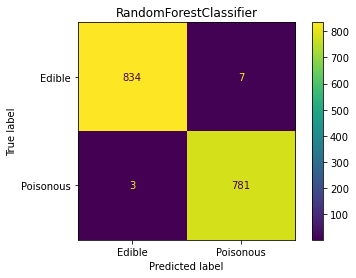

---------------------
Train 2: [   0    1    3 ... 8121 8122 8123] 
Test 2: [   2    4    8 ... 8114 8116 8117] 
Accuracy 2: 0.9963076923076923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 0.9963475638797124


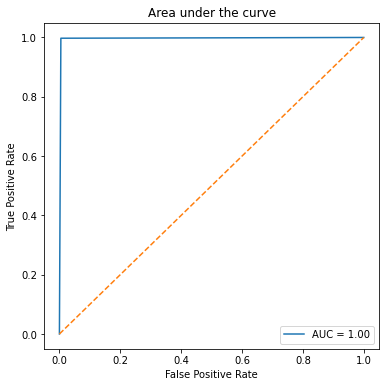

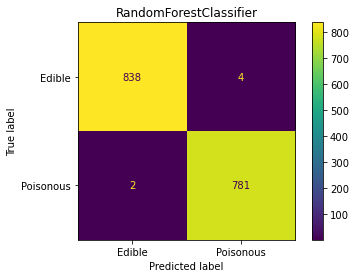

---------------------
Train 3: [   0    1    2 ... 8120 8122 8123] 
Test 3: [   3    5    9 ... 8103 8109 8121] 
Accuracy 3: 0.9963076923076923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 0.9962580731275956


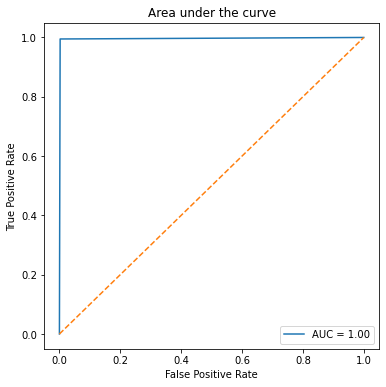

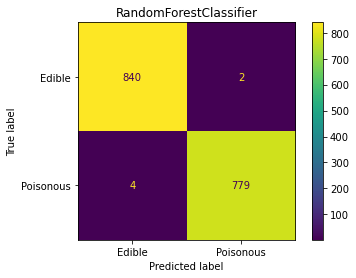

---------------------
Train 4: [   0    1    2 ... 8120 8121 8122] 
Test 4: [  13   16   17 ... 8101 8105 8123] 
Accuracy 4: 0.9944615384615385
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       842
           1       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

AUC value: 0.9942528735632183


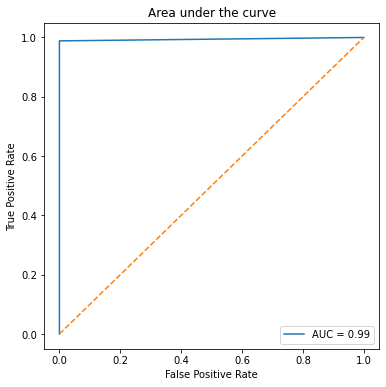

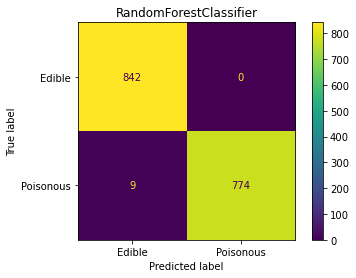

---------------------
Train 5: [   0    2    3 ... 8119 8121 8123] 
Test 5: [   1    7   14 ... 8118 8120 8122] 
Accuracy 5: 0.9956896551724138
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

AUC value: 0.995706169903554


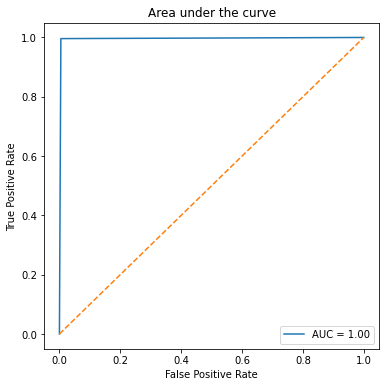

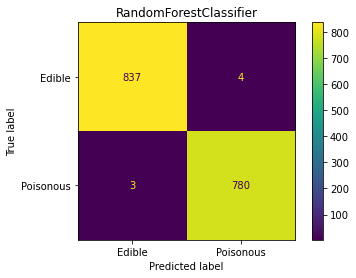

---------------------
Mean accuracy : 0.9953225464190982
Standard Deviation : 0.000999686292075193


In [26]:
X = mushroom_data.drop('class', axis = 1)
y = mushroom_data[['class']]
y_labels = ['Edible', 'Poisonous']

# create Random Forest model
rfc = RandomForestClassifier(n_estimators = 100, 
                             random_state = 42)
accuracy = []

# Create k-folds cross validation object
k = 5
cv = StratifiedKFold(n_splits = k,
                     shuffle = True, 
                     random_state = 42)
for train_index, test_index in cv.split(X,y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    rfc.fit(X1_train, y1_train)
    prediction = rfc.predict(X1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)
    print(f'Train {len(accuracy)}:', 
          train_index, f'\nTest {len(accuracy)}:', 
          test_index, f'\nAccuracy {len(accuracy)}:', 
          score)
    print(classification_report(y1_test, prediction))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, prediction)
    auc_1 = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(6, 6))
    plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc_1)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc='lower right')
    plt.title("Area under the curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print('AUC value:', auc_1)
    # display confusion matrix
    cm = confusion_matrix(y1_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=y_labels)
    disp.plot()
    plt.title(f'{type(rfc).__name__}')
    plt.show()
    print('---------------------')
print('Mean accuracy :', np.array(accuracy).mean())
print('Standard Deviation :', np.array(accuracy).std())

Train 1: [   1    2    3 ... 8121 8122 8123] 
Test 1: [   0    6   11 ... 8107 8115 8119] 
Accuracy 1: 0.9926153846153846
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       841
           1       1.00      0.98      0.99       784

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

AUC value: 0.9923469387755102


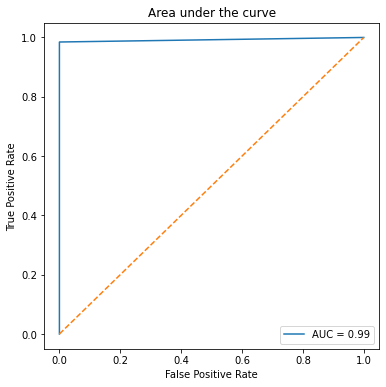

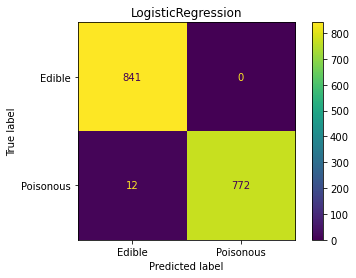

---------------------
Train 2: [   0    1    3 ... 8121 8122 8123] 
Test 2: [   2    4    8 ... 8114 8116 8117] 
Accuracy 2: 0.992
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       842
           1       1.00      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

AUC value: 0.9916985951468711


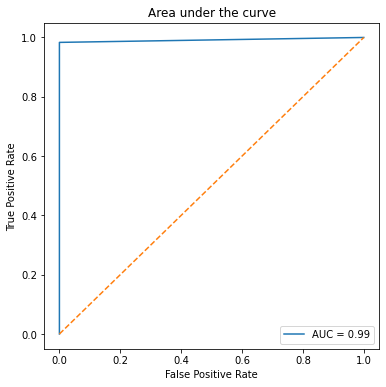

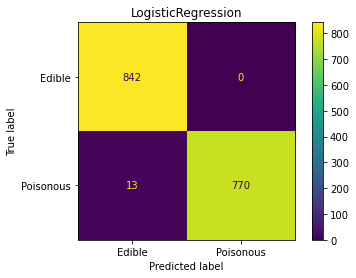

---------------------
Train 3: [   0    1    2 ... 8120 8122 8123] 
Test 3: [   3    5    9 ... 8103 8109 8121] 
Accuracy 3: 0.9932307692307693
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       842
           1       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

AUC value: 0.9930652251071613


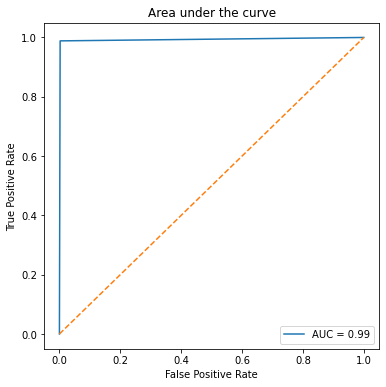

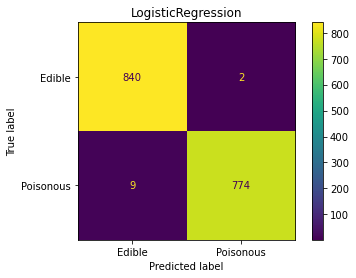

---------------------
Train 4: [   0    1    2 ... 8120 8121 8122] 
Test 4: [  13   16   17 ... 8101 8105 8123] 
Accuracy 4: 0.9858461538461538
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       842
           1       1.00      0.97      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

AUC value: 0.9853128991060025


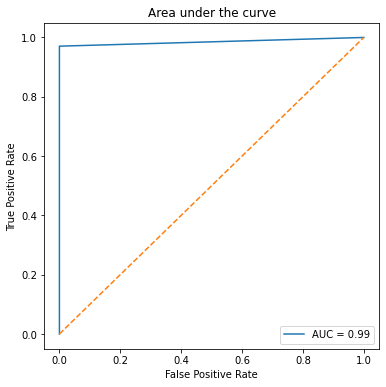

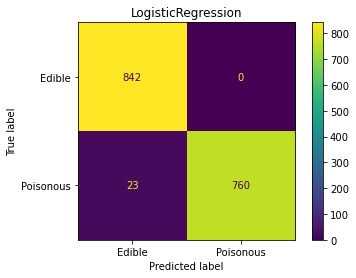

---------------------
Train 5: [   0    2    3 ... 8119 8121 8123] 
Test 5: [   1    7   14 ... 8118 8120 8122] 
Accuracy 5: 0.9907635467980296
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       841
           1       1.00      0.98      0.99       783

    accuracy                           0.99      1624
   macro avg       0.99      0.99      0.99      1624
weighted avg       0.99      0.99      0.99      1624

AUC value: 0.9904214559386972


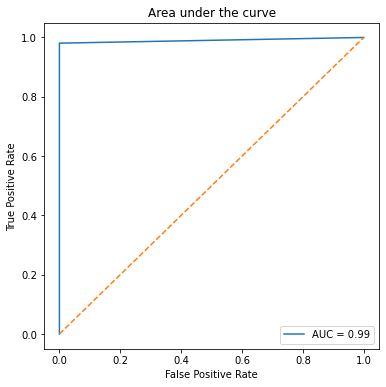

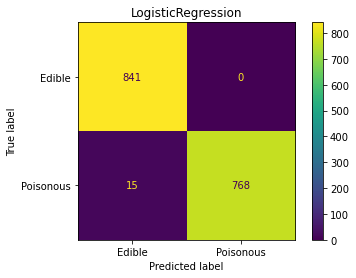

---------------------
Mean accuracy : 0.9908911708980674
Standard Deviation : 0.0026512118075954585


In [27]:
# create Logictic Regression Classifier model
lr = LogisticRegression(random_state = 42)
accuracy = []
for train_index, test_index in cv.split(X,y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X1_train, y1_train)
    prediction = lr.predict(X1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)
    print(f'Train {len(accuracy)}:', 
          train_index, f'\nTest {len(accuracy)}:', 
          test_index, f'\nAccuracy {len(accuracy)}:', 
          score)
    print(classification_report(y1_test, prediction))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, prediction)
    auc_1 = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(6, 6))
    plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc_1)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc='lower right')
    plt.title("Area under the curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print('AUC value:', auc_1)
    # display confusion matrix
    cm = confusion_matrix(y1_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=y_labels)
    disp.plot()
    plt.title(f'{type(lr).__name__}')
    plt.show()
    print('---------------------')
print('Mean accuracy :', np.array(accuracy).mean())
print('Standard Deviation :', np.array(accuracy).std())

Train 1: [   1    2    3 ... 8121 8122 8123] 
Test 1: [   0    6   11 ... 8107 8115 8119] 
Accuracy 1: 0.9938461538461538
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       841
           1       0.99      1.00      0.99       784

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

AUC value: 0.993925022446553


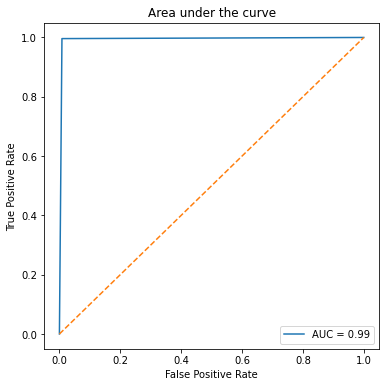

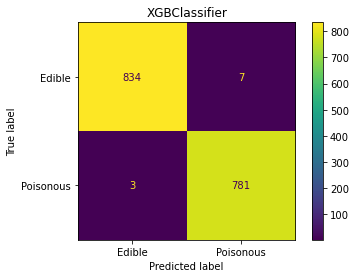

---------------------
Train 2: [   0    1    3 ... 8121 8122 8123] 
Test 2: [   2    4    8 ... 8114 8116 8117] 
Accuracy 2: 0.9963076923076923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 0.9963475638797124


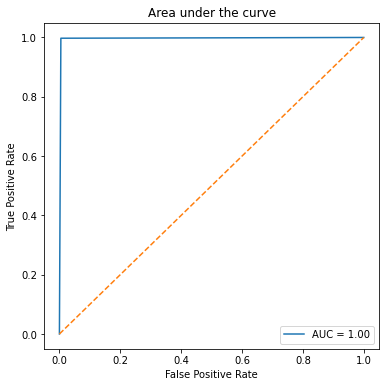

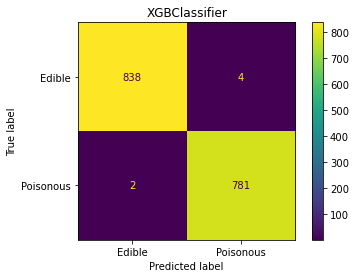

---------------------
Train 3: [   0    1    2 ... 8120 8122 8123] 
Test 3: [   3    5    9 ... 8103 8109 8121] 
Accuracy 3: 0.9956923076923077
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 0.9957089942756254


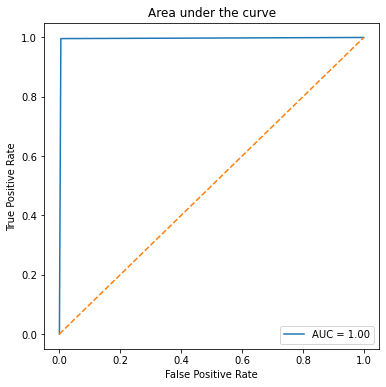

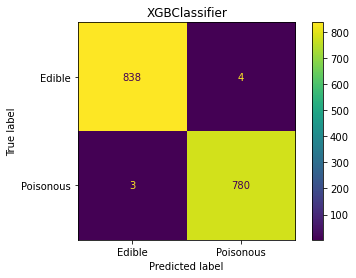

---------------------
Train 4: [   0    1    2 ... 8120 8121 8122] 
Test 4: [  13   16   17 ... 8101 8105 8123] 
Accuracy 4: 0.9956923076923077
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       842
           1       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC value: 0.9955300127713921


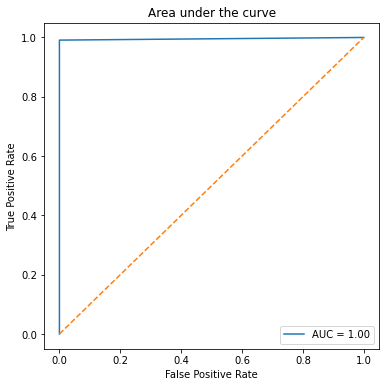

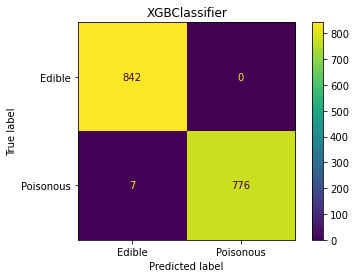

---------------------
Train 5: [   0    2    3 ... 8119 8121 8123] 
Test 5: [   1    7   14 ... 8118 8120 8122] 
Accuracy 5: 0.9956896551724138
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       841
           1       1.00      0.99      1.00       783

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

AUC value: 0.995618091337473


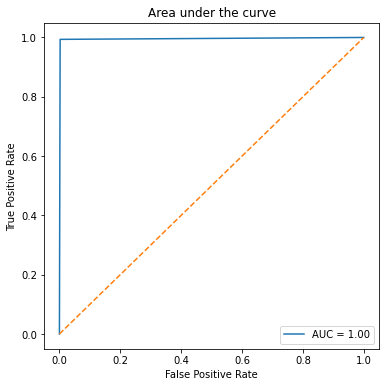

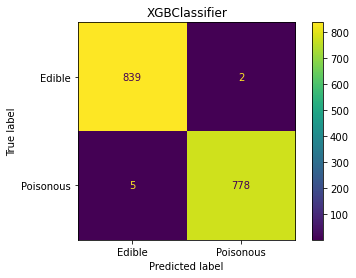

---------------------
Mean accuracy of the model : 0.9954456233421751
Standard Deviation : 0.0008345925282892023


In [28]:
# create XG Boost model
xgb = XGBClassifier(random_state = 42)
accuracy = []
for train_index, test_index in cv.split(X,y):
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    xgb.fit(X1_train, y1_train)
    prediction = xgb.predict(X1_test)
    score = accuracy_score(y1_test, prediction)
    accuracy.append(score)
    print(f'Train {len(accuracy)}:', 
          train_index, f'\nTest {len(accuracy)}:', 
          test_index, f'\nAccuracy {len(accuracy)}:', 
          score)
    print(classification_report(y1_test, prediction))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, prediction)
    auc_1 = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(6, 6))
    plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc_1)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc='lower right')
    plt.title("Area under the curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print('AUC value:', auc_1)
    # display confusion matrix
    cm = confusion_matrix(y1_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=y_labels)
    disp.plot()
    plt.title(f'{type(xgb).__name__}')
    plt.show()
    print('---------------------')
print('Mean accuracy of the model :', np.array(accuracy).mean())
print('Standard Deviation :', np.array(accuracy).std())

Now we can compare models. It looks like Random Forest and XG boost performed the best with 99.53 and 99.54 respectively which makes sense because they are both ensemble methods and similar to each other. Logistic Regression also performed well at 99.09%. Looking at the confusion matrix for Logistic Regression, we see that it misclassified poisonous mushrooms as edible while misclassifying very few of the edible ones as poisonous. This suggests that it concentrated on features in the dataset that are more strongly correlated with edible mushrooms than with poisonous ones, leading the model to more accurately classify the edible mushrooms. Predicting poisonous mushrooms as edible is much worse than the other way around as it could make a lot of people sick.

# Conclusion

Using the full dataset, Random Forest with 100 trees and XG Boost performed at 100% accuracy on each fold, while Logistic regression only got 1 wrong on all 5 folds combined. This means our predictors did an excellent job in predicting the edibility of mushrooms and also might suggest that we made good decisions by picking a good model, imputing missing values, removing unnecessary variables, and doing one-hot encoding.

A perfect classification model has an AUC of 1.0, indicating that it correctly identifies all positive and negative samples. A model with an AUC of 0.5 is no better than random guessing, while a model with an AUC below 0.5 is worse than random guessing.

It is important to note that 100% accuracy on a classification problem is unusual and raises the possibility of overfitting. It is important to thoroughly evaluate the models and ensure that they generalize well to new data.

Even with K-fold cross-validation, overfitting can still occur if the model is too complex or if the dataset is too small. Therefore, it is important to regularly evaluate the model's performance on new data and to ensure that the model is not overfitting to the training data.

The reason our model performed well is because of our predictors. During our EDA, we noted that predictors such as bruising and odor are excellent predictors, producing good results even with 6 predictors. Also, our target variable was balanced, which reduces the risk of the model being biased towards one class or the other, and ensures that the model is trained on a representative sample of the data. One-hot encoding helped with model efficiency, and allowed the models to better understand the relationship between the different attributes of the mushrooms and the target variable, and resulted in more accurate predictions.